In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv")

In [3]:
df=data.copy()

In [4]:
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [5]:
df["gender"].value_counts()

gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64

In [6]:
gender_mask={"Non-Binary" : 0, "Female" : 1,"Male" : 2}

In [7]:
df["gender"]=df["gender"].map(gender_mask)

In [8]:

most_frequent_value = df['gender'].mode()[0]


df['gender'].fillna(most_frequent_value, inplace=True)


/tmp/ipykernel_17/412722619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(most_frequent_value, inplace=True)


In [9]:
dfage=df["age"].mean()
df["age"].fillna(dfage, inplace=True)

/tmp/ipykernel_17/2326727789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(dfage, inplace=True)


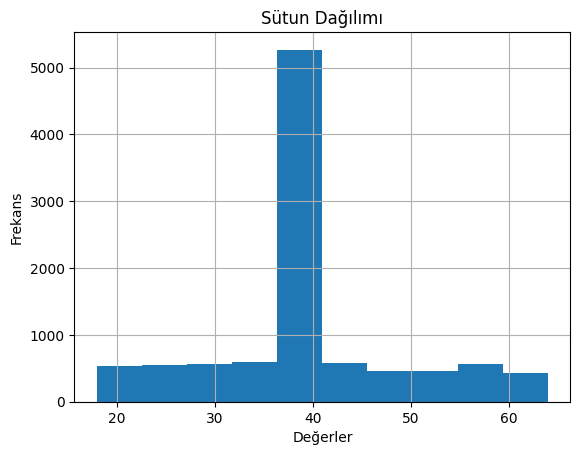

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



df['age'].hist(bins=10)
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Sütun Dağılımı')
plt.show()


In [11]:
df.isnull().sum()

id                     0
full_name              0
age                    0
gender                 0
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [12]:
df["device_type"].unique()

array(['Desktop', nan, 'Mobile', 'Tablet'], dtype=object)

In [13]:
device_mask={"Desktop":0,"Mobile":1,"Tablet":2}

df["device_type"]=df["device_type"].map(device_mask)

In [14]:
gender_mode=df["device_type"].mode()[0]

df["device_type"].fillna(gender_mode,inplace=True)

/tmp/ipykernel_17/327261280.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["device_type"].fillna(gender_mode,inplace=True)


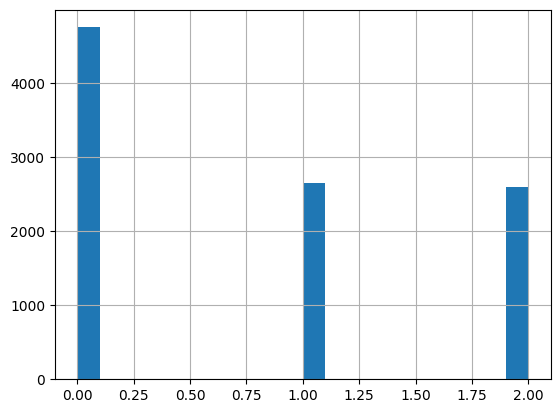

In [15]:
df["device_type"].hist(bins=20)
plt.show()

In [16]:
df["ad_position"].unique()

array(['Top', 'Side', nan, 'Bottom'], dtype=object)

In [17]:
ad_mask={'Top':0, 'Side':1,'Bottom':2}

df["ad_position"]=df["ad_position"].map(ad_mask)

In [18]:
ad_value=df["ad_position"].mode()[0]

df["ad_position"].fillna(ad_value,inplace=True)

/tmp/ipykernel_17/2022358809.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ad_position"].fillna(ad_value,inplace=True)


In [19]:
brow_value=df["browsing_history"].mode()[0]

df["browsing_history"].fillna(brow_value,inplace=True)

/tmp/ipykernel_17/2719982855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["browsing_history"].fillna(brow_value,inplace=True)


In [20]:
browsing_mask={"Entertainment":0,"Social Media":1,"Education":2,"Shopping":3,"News":4}
df["browsing_history"]=df["browsing_history"].map(browsing_mask)

In [21]:
df["time_of_day"].value_counts()

time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64

In [22]:
import pandas as pd


time_map = {
    'Morning': 0,
    'Afternoon': 0,
    'Evening': 1,
    'Night': 1
}


df['time_of_day'] = df['time_of_day'].map(time_map)


print(df['time_of_day'].value_counts())


time_of_day
0.0    4142
1.0    3858
Name: count, dtype: int64


In [23]:
time_value=df["time_of_day"].mode()[0]

df["time_of_day"].fillna(time_value,inplace=True)

/tmp/ipykernel_17/4239641326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["time_of_day"].fillna(time_value,inplace=True)


In [24]:

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])


df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,-1.916403,1.0,0.0,0.0,3,0.0,1
1,3044,User3044,0.000000,2.0,0.0,0.0,0,0.0,1
2,5912,User5912,0.084527,0.0,0.0,1.0,2,1.0,1
3,5418,User5418,-0.652657,2.0,0.0,2.0,0,1.0,1
4,9452,User9452,-0.126097,0.0,0.0,2.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,0.000000,1.0,1.0,0.0,2,0.0,0
9996,7843,User7843,0.000000,1.0,0.0,2.0,0,0.0,0
9997,3914,User3914,0.000000,2.0,1.0,1.0,0,0.0,0
9998,7924,User7924,0.000000,1.0,0.0,2.0,3,0.0,1


In [25]:

age_mode = df['age'].mean()


df['age'].replace(0, age_mode, inplace=True)


df.head()

/tmp/ipykernel_17/2909103974.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, age_mode, inplace=True)


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,-1.916403e+00,1.0,0.0,0.0,3,0.0,1
1,3044,User3044,1.652012e-16,2.0,0.0,0.0,0,0.0,1
2,5912,User5912,8.452736e-02,0.0,0.0,1.0,2,1.0,1
3,5418,User5418,-6.526574e-01,2.0,0.0,2.0,0,1.0,1
4,9452,User9452,-1.260969e-01,0.0,0.0,2.0,1,0.0,0


In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

X = df.drop(columns=["id", "full_name", "click"])
y = df["click"]

def evaluate_classification_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    models_accuracy = {}

  
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'XGBoost': xgb.XGBClassifier()
    }
    
  
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        models_accuracy[name] = accuracy
        print(f"{name} Accuracy: {accuracy}")
        print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    
    return models_accuracy


evaluate_classification_models(X, y)


Logistic Regression Accuracy: 0.6465
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.65      1.00      0.79      1295

    accuracy                           0.65      2000
   macro avg       0.32      0.50      0.39      2000
weighted avg       0.42      0.65      0.51      2000

Logistic Regression Confusion Matrix:
[[   0  705]
 [   2 1293]]
SVC Accuracy: 0.6485
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.01      0.03       705
           1       0.65      0.99      0.79      1295

    accuracy                           0.65      2000
   macro avg       0.60      0.50      0.41      2000
weighted avg       0.62      0.65      0.52      2000

SVC Confusion Matrix:
[[  10  695]
 [   8 1287]]
Decision Tree Accuracy: 0.729
Decision Tree Classification Report:
              precision    recall  f1

{'Logistic Regression': 0.6465,
 'SVC': 0.6485,
 'Decision Tree': 0.729,
 'Random Forest': 0.721,
 'K-Nearest Neighbors': 0.658,
 'Naive Bayes': 0.646,
 'Gradient Boosting': 0.668,
 'AdaBoost': 0.6585,
 'Extra Trees': 0.718,
 'XGBoost': 0.734}

In [27]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

NameError: name 'X_train' is not defined